In [90]:
!pip install iterative-stratification

You should consider upgrading via the '/home/cherepaha/miniconda/envs/py37/bin/python -m pip install --upgrade pip' command.


In [91]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [46]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from sklearn.model_selection import train_test_split

In [68]:
all_meta = pd.read_csv('data/train_metadata_extended.csv')
with open('data/scored_birds.json') as fin:
    test_birds = json.load(fin)

In [69]:
all_meta.loc[:, 'secondary_labels'] = all_meta.secondary_labels.apply(eval)
all_meta['target_raw'] = all_meta.secondary_labels + all_meta.primary_label.apply(lambda x: [x])

In [70]:
all_species = sorted(set(all_meta.target_raw.sum()))
species2id = {s: i for i, s in enumerate(all_species)}
id2species = {i: s for i, s in enumerate(all_species)}

all_meta['target'] = all_meta.target_raw.apply(lambda species: [int(s in species) for s in all_species])

In [94]:
kfold = MultilabelStratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [113]:
for train_index, test_index in kfold.split(all_meta, all_target):
    break
train_meta = all_meta.iloc[train_index]
val_meta = all_meta.iloc[test_index]

In [118]:
train_meta, val_meta = train_test_split(
    all_meta,
    test_size=0.2,
    random_state=42,
#     stratify=all_target[:, all_target.sum(axis=0) >= 100]
)

In [114]:
train_target = np.array([t for t in train_meta.target])
val_target = np.array([t for t in val_meta.target])
all_target = np.array([t for t in all_meta.target])

In [115]:
def count_stat(meta, target):
    proportion = target.mean(axis=0)
    duration = (meta.duration.values[:, None] * target).mean(axis=0, where=target.astype(bool))
    neighbours_count = (target.sum(axis=1)[:, None] * target).mean(axis=0, where=target.astype(bool))
    rating = (meta.rating.values[:, None] * target).mean(axis=0, where=target.astype(bool))
    target_bird = [b in test_birds for b in all_species]
    
    birds_stat = pd.DataFrame({
        'bird': all_species, 
        'proportion': proportion,
        'duration': duration,
        'neighbours_count': neighbours_count,
        'rating': rating,
        'is_target': target_bird
    })
    birds_stat.set_index('bird', inplace=True)
    return birds_stat

In [116]:
train_stat = count_stat(train_meta, train_target)
val_stat = count_stat(val_meta, val_target)
all_stat = count_stat(all_meta, all_target)

/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


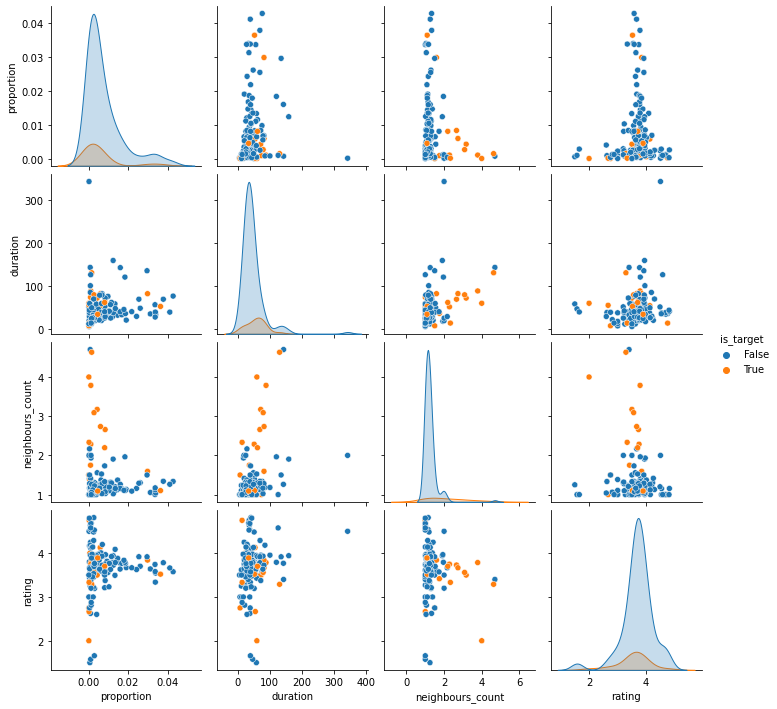

In [101]:
sns.pairplot(
    train_stat,
    hue='is_target'
)

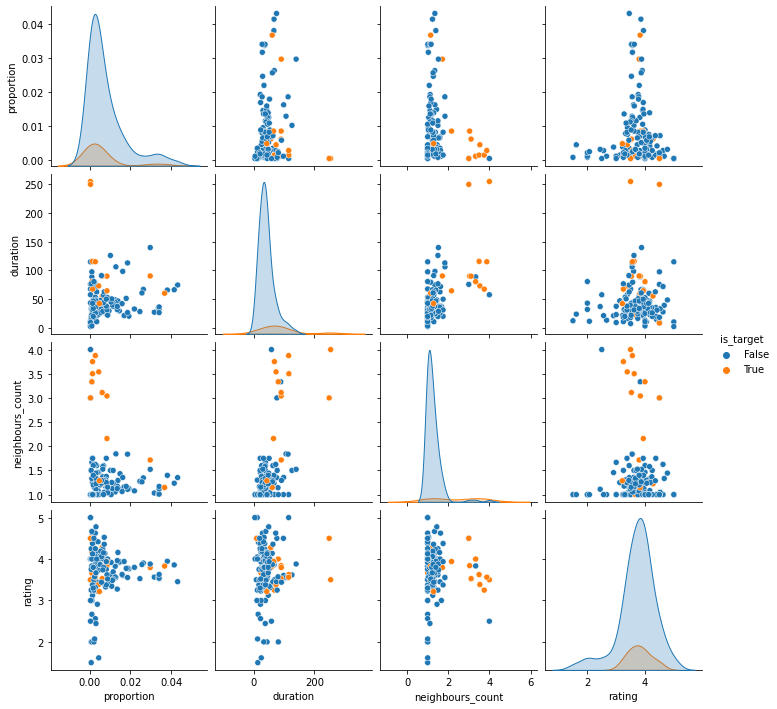

In [102]:
sns.pairplot(
    val_stat,
    hue='is_target'
)

In [117]:
(val_stat[val_stat.is_target].proportion - train_stat[train_stat.is_target].proportion)/all_stat[all_stat.is_target].proportion

bird
akiapo    -0.144984
aniani     0.002276
apapan     0.002276
barpet     0.002276
crehon    -1.249432
elepai     0.141354
ercfra     0.836747
hawama     0.002276
hawcre    -0.160991
hawgoo     0.457442
hawhaw     0.836747
hawpet1   -1.249432
houfin    -0.006201
iiwi       0.002276
jabwar     0.030723
maupar     5.009106
omao      -0.028254
puaioh    -1.249432
skylar     0.009204
warwhe1    0.033055
yefcan     0.020416
Name: proportion, dtype: float64

In [112]:
(val_stat[val_stat.is_target].proportion - train_stat[train_stat.is_target].proportion)/all_stat[all_stat.is_target].proportion

bird
akiapo     0.220302
aniani     1.249558
apapan    -0.000252
barpet    -0.000252
crehon    -1.250063
elepai     1.180124
ercfra    -0.208554
hawama    -0.000252
hawcre    -1.250063
hawgoo    -0.113872
hawhaw     0.832955
hawpet1   -1.250063
houfin    -0.022822
iiwi      -0.139120
jabwar     0.028152
maupar    -1.250063
omao       0.121680
puaioh    -1.250063
skylar    -0.016394
warwhe1   -0.123185
yefcan    -0.344403
Name: proportion, dtype: float64

In [119]:
train_stat[train_stat.is_target]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
akiapo,0.001178,88.142857,3.785714,3.785714,True
aniani,0.001010,36.000000,1.750000,3.416667,True
apapan,0.008413,68.890000,2.660000,3.730000,True
barpet,0.001010,73.416667,1.000000,3.500000,True
crehon,0.000168,59.500000,4.000000,2.000000,True
elepai,0.001178,51.142857,2.285714,3.750000,True
ercfra,0.000337,13.250000,1.000000,4.750000,True
hawama,0.004375,71.538462,3.173077,3.500000,True
hawcre,0.001598,130.473684,4.631579,3.289474,True


In [75]:
all_stat[all_stat.is_target].sort_values('proportion')

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
maupar,0.000067,249.000000,3.000000,4.500000,True
crehon,0.000135,59.500000,4.000000,2.000000,True
hawhaw,0.000202,89.333333,2.333333,3.000000,True
puaioh,0.000202,13.333333,2.333333,3.333333,True
hawpet1,0.000202,54.666667,1.000000,2.666667,True
ercfra,0.000404,11.833333,1.000000,4.666667,True
hawgoo,0.000741,23.090909,1.272727,3.909091,True
aniani,0.001010,33.933333,1.666667,3.566667,True
barpet,0.001010,67.533333,1.000000,3.600000,True


In [ ]:
train_test_split(all_meta, 